
# **Step 1**
## Enabling and testing the GPU

The notebook's GPUs must first be enabled:

- Select Notebook Settings under Edit.
- choose GPU using the Hardware Accelerator drop-down

Next, we'll check if Tensorflow can connect to the GPU: By executing the following code, you may quickly determine whether the GPU is enabled.

In [ ]:
# Check if NVIDIA GPU is enabled
!nvidia-smi

# **Step 2**
Mounting the Drive to store and load files.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Let's make the required files and directories for training with custom objects.


1. **custom_data/images**
2. **custom_data/custom.names**
3. **custom_data/train.txt**
4. **custom_data/test.txt**
5. **custom_data/backup**
6. **custom_data/detector.data**
7. **custom_data/cfg**

# **Step 3**
## *Creating Image Directory*
We will train our model to recognise pistols in this project, thus we must gather the images and its annotaions and save them in the ***custom data/images*** directory.

## Unzip Files
* Your Google Drive file location that you wish to unzip is the first path in the cell below.
* Where you wish to extract the zip file from Google Drive as shown by the second path in the cell below.


In our case text files should be saved in **custom_data/images** directory. For e.g. **image1.jpg** should have a text file **image1.txt**.

In [ ]:
!unzip "/content/gdrive/MyDrive/custom_data/zip/images.zip" -d "/content/gdrive/MyDrive/custom_data/images"

Archive:  /content/gdrive/MyDrive/custom_data/zip/images.zip
replace /content/gdrive/MyDrive/custom_data/images/008812fa2df9d65fae04ce6c14a3e54e.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# **Step 4**
## *Creating Custom.names file*
Labels of our objects should be saved in **custom_data/custom.names** file, each line in the file corresponds to an object. In our case since we have only one object class, the file should contain the following.


# **Step 5**
## *Creating Train and Test files*
The annotated photos can then be randomly split into train and test sets in a **80:20** ratio.

**custom data/train.txt** The location of the train dataset should be listed in each file row.

**custom data/test.txt** The location of the test dataset should be listed in each file row.


# **Step 6**
## *Creating Backup directory*
Creating backup directory for storing weights of the trained model.

# **Step 7**
## *Creating YOLO data file*
Make a file called "detector.data" in the "custom data" directory that contains details about the train and test data sets.

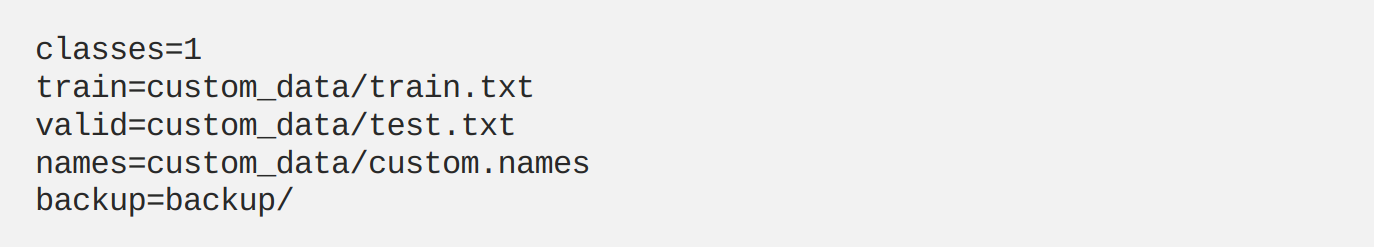

# **Step 8**
## *Cloning Directory to use Darknet*
Darknet, an open source neural network framework, will be used to train the detector. Download and create a dark network

In [ ]:
!git clone https://github.com/AlexeyAB/darknet

In [ ]:
# Change current working directory to Darknet
%cd darknet

/content/darknet


### Change makefile to have GPU and OPENCV enabled, and other parameters for faster computation.

In [ ]:
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

In [ ]:
# Make file
"/content/darknet/Makefile"

### Model Compilation

In [ ]:
# compiling the model
!make

# **Step 9**
## *Making changes in the yolo Configuration file*


# **Step 10**
## *Downloading Pre-trained weights*
To train our object detector, we can use the pre-trained weights that have already been trained on a large data sets. The pre-trained weights are available [here](https://pjreddie.com/media/files/darknet53.conv.74), and they can be downloaded to the root directory.

In [ ]:
# Download weights darknet model 53
!wget https://pjreddie.com/media/files/darknet53.conv.74

In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()


# **Step 11**
## *Training the model*
As soon as we have all the necessary files and annotated photographs, we can begin our training.
Up till the loss reaches a predefined level, we can keep training. Weights for the custom detector are initially saved once every 100 iterations until 1,000 iterations, after which they are saved once every 10,000 iterations by default.

We can do detection using the generated weights after the training is finished.

## *Continue training from where you left*
Continue training from where you left off, your Model training can be stopped due to multiple reasons, like the notebook time out, notebook craches, due to network issues,  and many more,  so you can start your training from where you left off, by passing the previous trained weights.

In [ ]:
!./darknet detector train /content/gdrive/MyDrive/custom_data/detector.data /content/gdrive/MyDrive/custom_data/cfg/yolov3-custom.cfg darknet53.conv.74 -dont_show

In [ ]:
imShow('chart.png')

In [ ]:
!./darknet detector train /content/gdrive/MyDrive/custom_data/detector.data /content/gdrive/MyDrive/custom_data/cfg/yolov3-custom.cfg /content/gdrive/MyDrive/custom_data/backup/yolov3-custom_final.weights -dont_show

In [ ]:
%cd cfg
!sed -i 's/batch=64/batch=1/' /content/gdrive/MyDrive/custom_data/cfg/yolov3-custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' /content/gdrive/MyDrive/custom_data/cfg/yolov3-custom.cfg
%cd ..

/content/darknet/cfg
/content/darknet


In [ ]:
!./darknet detector test /content/gdrive/MyDrive/custom_data/detector.data /content/gdrive/MyDrive/custom_data/cfg/yolov3-custom.cfg /content/gdrive/MyDrive/custom_data/backup/yolov3-custom_final.weights /content/gdrive/MyDrive/custom_data/images/0233fb25d24d36370422d41086b52267.jpg -thresh 0.3
imShow('predictions.jpg')


In [ ]:
!./darknet detector test /content/gdrive/MyDrive/custom_data/detector.data /content/gdrive/MyDrive/custom_data/cfg/yolov3-custom.cfg /content/gdrive/MyDrive/custom_data/backup/yolov3-custom_final.weights /content/gdrive/MyDrive/custom_data/images/tomaat2.jpg -thresh 0.3
imShow('predictions.jpg')


In [ ]:
!./darknet detector test /content/gdrive/MyDrive/custom_data/detector.data /content/gdrive/MyDrive/custom_data/cfg/yolov3-custom.cfg /content/gdrive/MyDrive/custom_data/backup/yolov3-custom_final.weights /content/gdrive/MyDrive/custom_data/images/IMG_2308.jpg -thresh 0.3
imShow('predictions.jpg')


In [ ]:
!./darknet detector test /content/gdrive/MyDrive/custom_data/detector.data /content/gdrive/MyDrive/custom_data/cfg/yolov3-custom.cfg /content/gdrive/MyDrive/custom_data/backup/yolov3-custom_final.weights /content/gdrive/MyDrive/custom_data/images/unnamed.jpg -thresh 0.3
imShow('predictions.jpg')

# **Step 12**
## *Calculating Mean average precision of Specific Weights*


In [ ]:
!./darknet detector map /content/gdrive/MyDrive/custom_data/detector.data /content/gdrive/MyDrive/custom_data/cfg/yolov3-custom.cfg /content/gdrive/MyDrive/custom_data/backup/yolov3-custom_final.weights -dont_show